In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express

from collections import Counter
import copy

from sklearn.feature_selection import RFE  #ranks features

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


from sklearn.cluster import KMeans


from sklearn.svm import SVR

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('pubg.csv')

In [3]:
data.drop(['Id','groupId','matchId'],axis=1,inplace=True)

In [5]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [6]:
data.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [7]:
data.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [10]:
data[data.winPlacePerc.isnull()]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,0,0,0.0,0,0,0,1,0,0,0,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [12]:
data.drop(2744604, inplace=True)

# EDA

In [13]:
m_types = data.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns = ["Type","Count"]
m_types

,Type,Count
0,squad-fpp,1756186
1,duo-fpp,996691
2,squad,626526
3,solo-fpp,536761
4,duo,313591
5,solo,181943
6,normal-squad-fpp,17174
7,crashfpp,6287
8,normal-duo-fpp,5489
9,flaretpp,2505


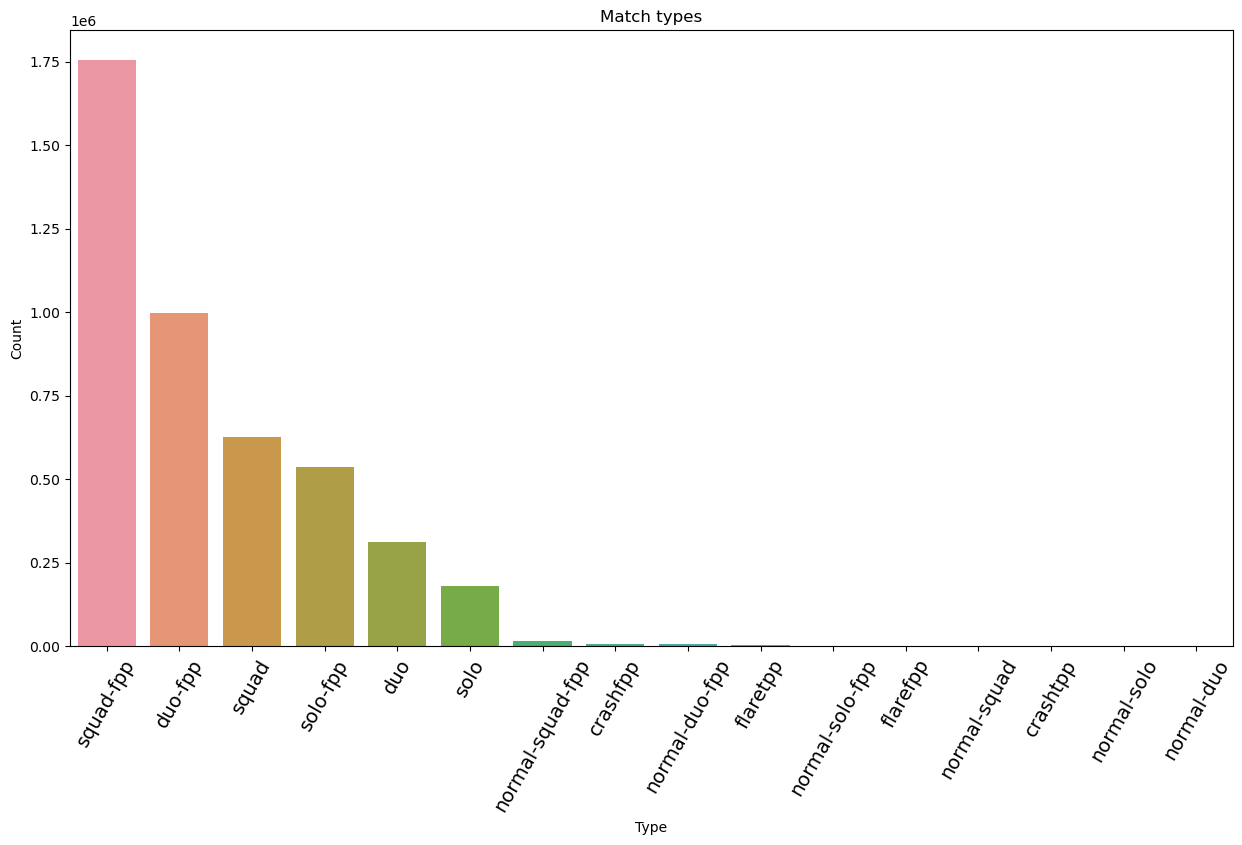

In [14]:
plt.figure(figsize=(15,8))
ticks = m_types.Type.values
ax = sns.barplot(x="Type", y="Count", data=m_types)
ax.set_xticklabels(ticks, rotation=60, fontsize=14)
ax.set_title("Match types")
plt.show()

In [15]:
m_types2 = data.loc[:,"matchType"].value_counts().to_frame()
aggregated_squads = m_types2.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
aggregated_duos = m_types2.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
aggregated_solo = m_types2.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()
aggregated_mt = pd.DataFrame([aggregated_squads,aggregated_duos,aggregated_solo], index=["squad","duo","solo"], columns =["count"])
aggregated_mt

,count
squad,2400402
duo,1315970
solo,720712


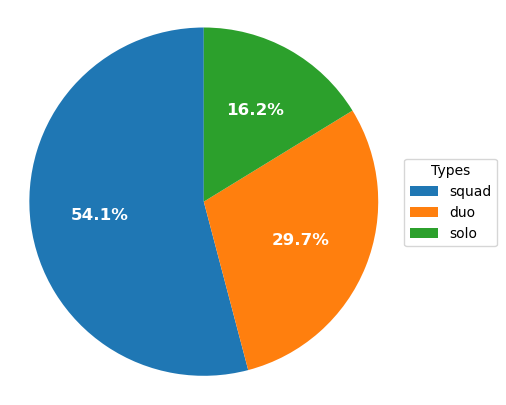

In [16]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
labels = ['squad', 'duo', 'solo']

wedges, texts, autotexts = ax1.pie(aggregated_mt["count"],textprops=dict(color="w"), autopct='%1.1f%%', startangle=90)

ax1.axis('equal')
ax1.legend(wedges, labels,
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.show()

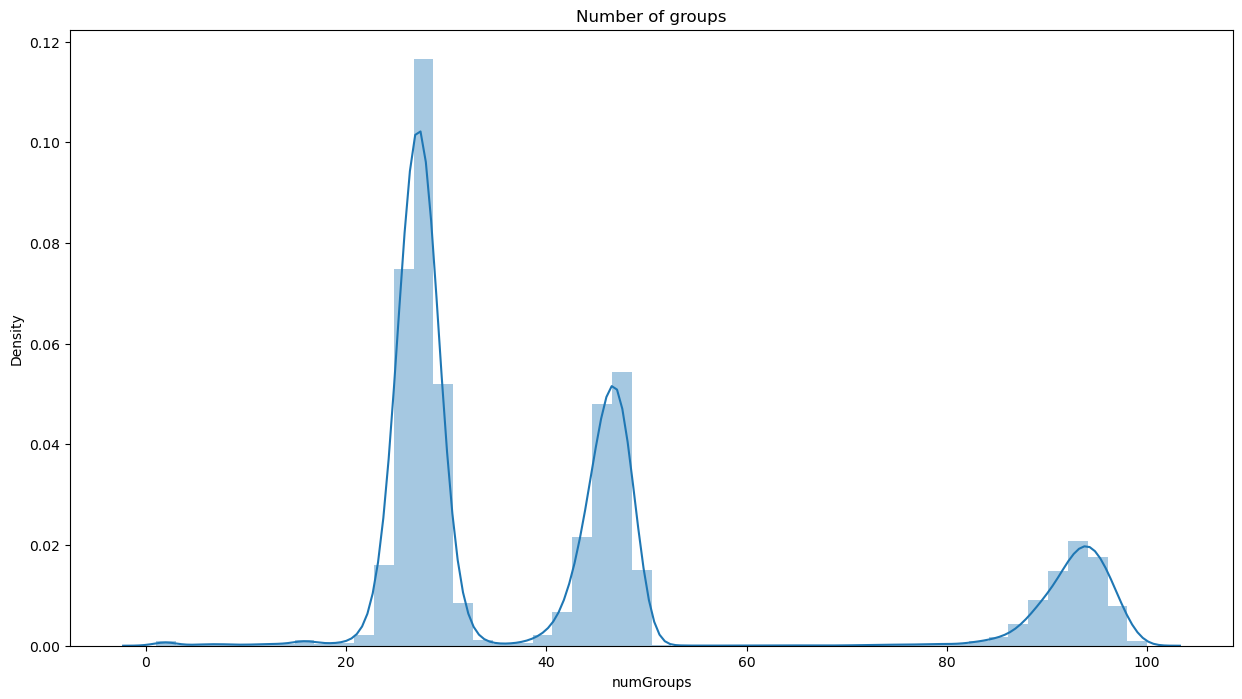

In [17]:
plt.figure(figsize=(15,8))
ax = sns.distplot(data["numGroups"])
ax.set_title("Number of groups")
plt.show()

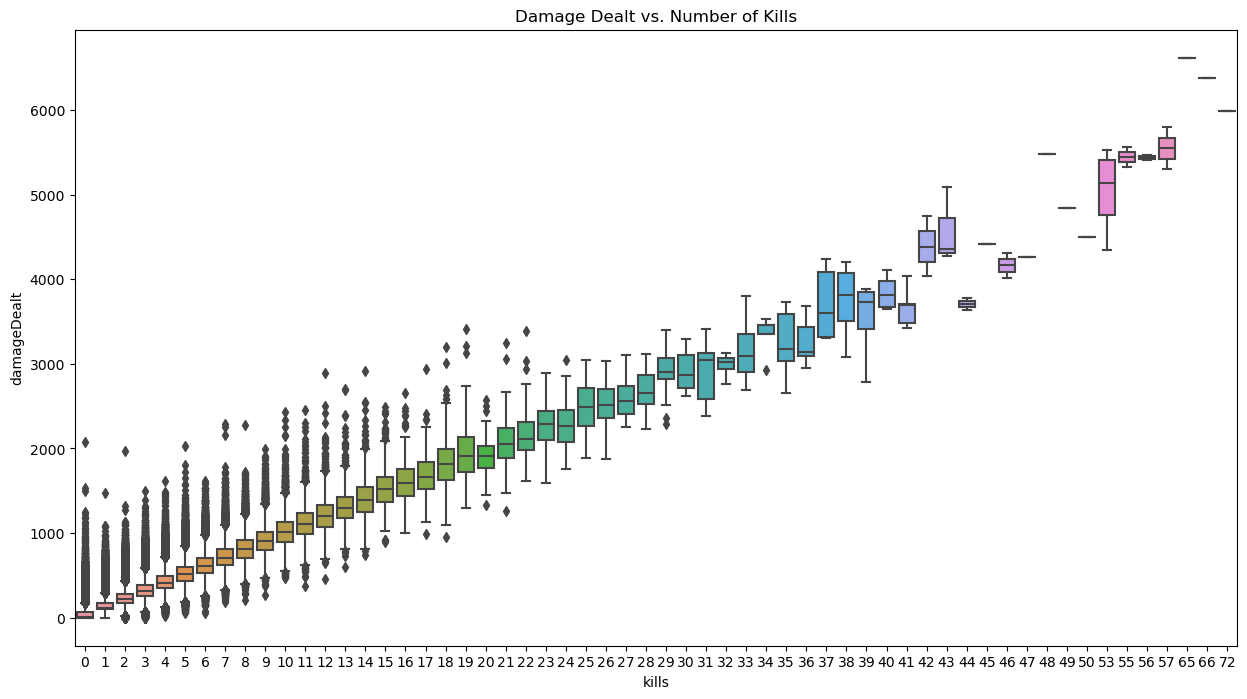

In [18]:
plt.figure(figsize=(15,8))
ax1 = sns.boxplot(x="kills",y="damageDealt", data = data)
ax1.set_title("Damage Dealt vs. Number of Kills")
plt.show()

In [19]:
data[data['kills']>60][["assists","damageDealt","headshotKills","kills","longestKill"]]

,assists,damageDealt,headshotKills,kills,longestKill
334400,20,6616.0,13,65,73.90
1248348,5,6375.0,21,66,319.90
3431247,7,5990.0,64,72,78.23


In [20]:
headshots = data[data['headshotKills']>0]

print("Maximum number of headshots that the player scored: " + str(data["headshotKills"].max()));

Maximum number of headshots that the player scored: 64


In [21]:
headshots = data[data['DBNOs']>0]
print("Mean number of DBNOs that the player scored: " + str(data["DBNOs"].mean()))

Mean number of DBNOs that the player scored: 0.657875652270706


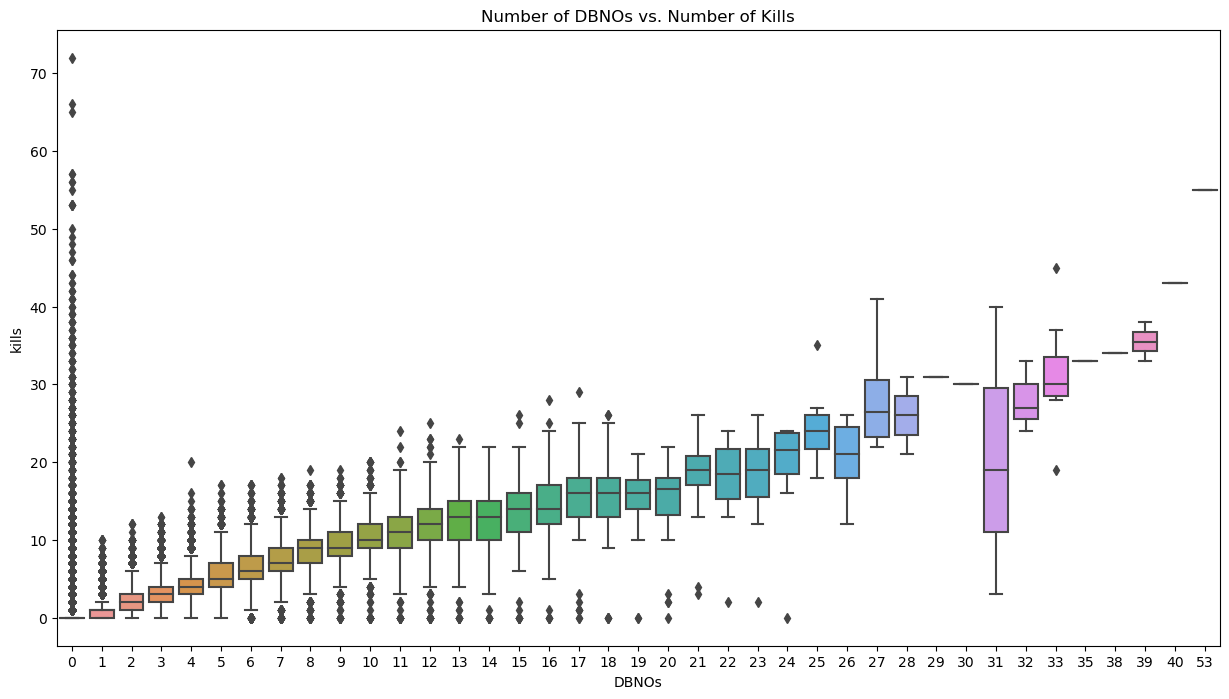

In [22]:
plt.figure(figsize=(15,8))
ax2 = sns.boxplot(x="DBNOs",y="kills", data = data)
ax2.set_title("Number of DBNOs vs. Number of Kills")
plt.show()

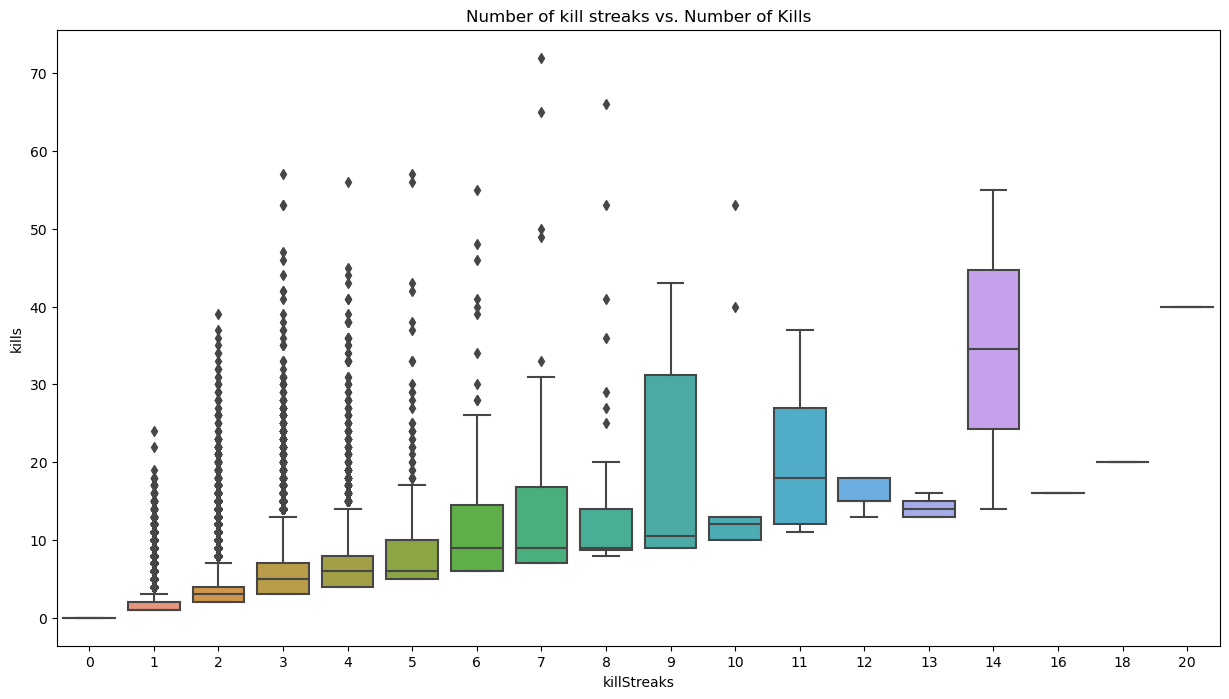

In [23]:
plt.figure(figsize=(15,8))
ax3 = sns.boxplot(x="killStreaks",y="kills", data = data)
ax3.set_title("Number of kill streaks vs. Number of Kills")
plt.show()

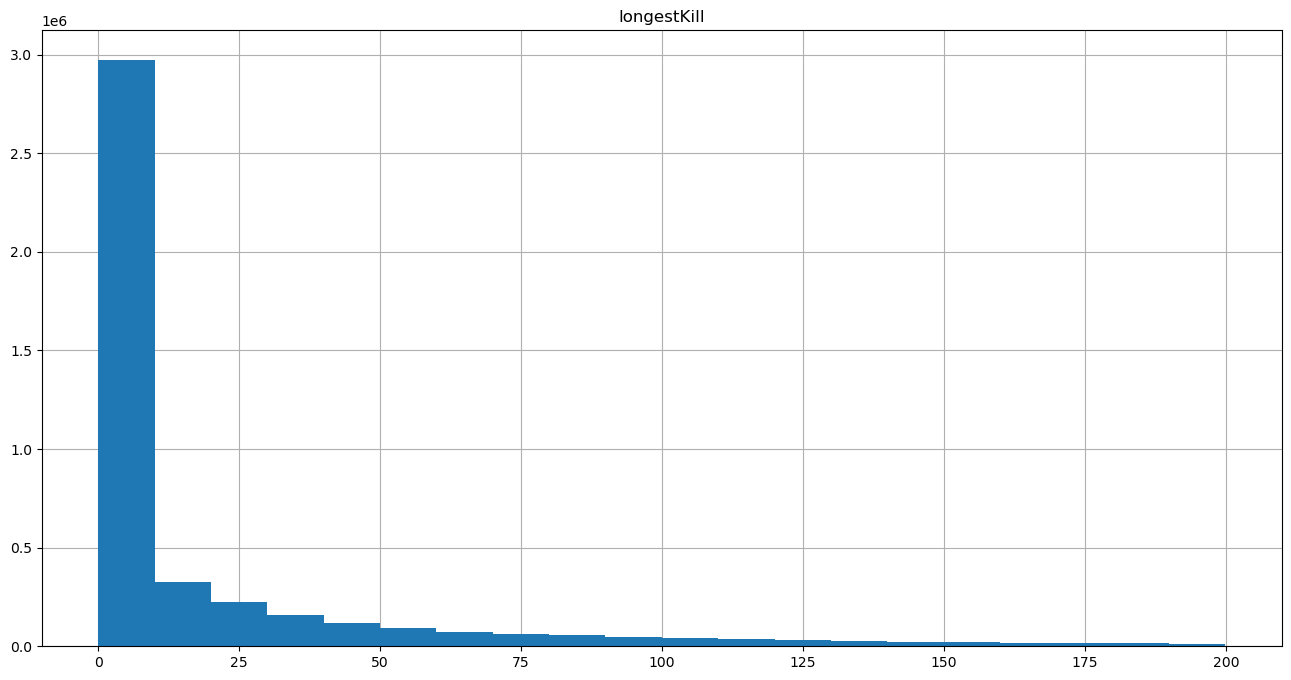

In [24]:
dist = data[data['longestKill']<200]
plt.rcParams['axes.axisbelow'] = True
dist.hist('longestKill', bins=20, figsize = (16,8))
plt.show()

In [25]:
print("Average longest kill distance a player achieve is {:.1f}m, 95% of them not more than {:.1f}m and a maximum distance is {:.1f}m." .format(data['longestKill'].mean(),data['longestKill'].quantile(0.95),data['longestKill'].max()))

Average longest kill distance a player achieve is 23.0m, 95% of them not more than 126.1m and a maximum distance is 1094.0m.


In [26]:
walk0 = data["walkDistance"] == 0
ride0 = data["rideDistance"] == 0
swim0 = data["swimDistance"] == 0
print("{} of players didn't walk at all, {} players didn't drive and {} didn't swim." .format(walk0.sum(),ride0.sum(),swim0.sum()))

99602 of players didn't walk at all, 3309428 players didn't drive and 4157693 didn't swim.


Average place of non-walking players is 0.044, minimum is 0.0 and the best is 1.0, 95% of players has a score below 0.25.


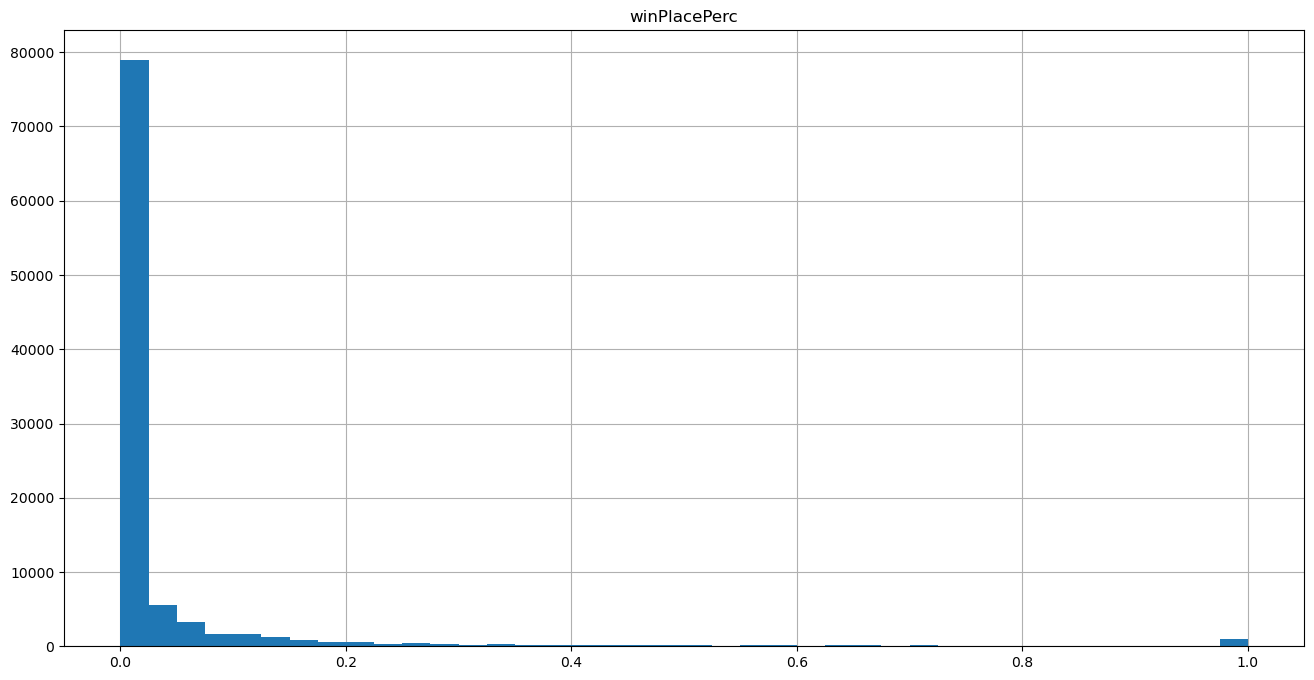

In [27]:
walk0_rows = data[walk0]
print("Average place of non-walking players is {:.3f}, minimum is {} and the best is {}, 95% of players has a score below {}."
      .format(walk0_rows["winPlacePerc"].mean(), walk0_rows["winPlacePerc"].min(), walk0_rows["winPlacePerc"].max(),walk0_rows["winPlacePerc"].quantile(0.95)))
walk0_rows.hist('winPlacePerc', bins=40, figsize = (16,8))
plt.show()

In [28]:
suspects = data.query('winPlacePerc ==1 & walkDistance ==0').head()
suspects.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3702,0,0,0.0000,0,0,0,1,0,0,0,...,0,0.0,0,0.0,0,0,0.0,3,0,1.0
8790,0,0,0.0000,0,0,0,2,0,0,0,...,0,0.0,0,0.0,0,0,0.0,1,0,1.0
9264,0,0,0.3218,0,0,0,1,0,0,0,...,0,0.0,0,0.0,0,0,0.0,9,0,1.0
18426,0,1,0.0000,0,0,0,2,0,0,0,...,0,0.0,0,0.0,0,0,0.0,6,0,1.0
19054,0,0,99.0000,0,0,0,1,0,0,0,...,0,0.0,0,0.0,0,0,0.0,9,0,1.0


In [29]:
print("Maximum ride distance for suspected entries is {:.3f} meters, and swim distance is {:.1f} meters." .format(suspects["rideDistance"].max(), suspects["swimDistance"].max()))

Maximum ride distance for suspected entries is 0.000 meters, and swim distance is 0.0 meters.


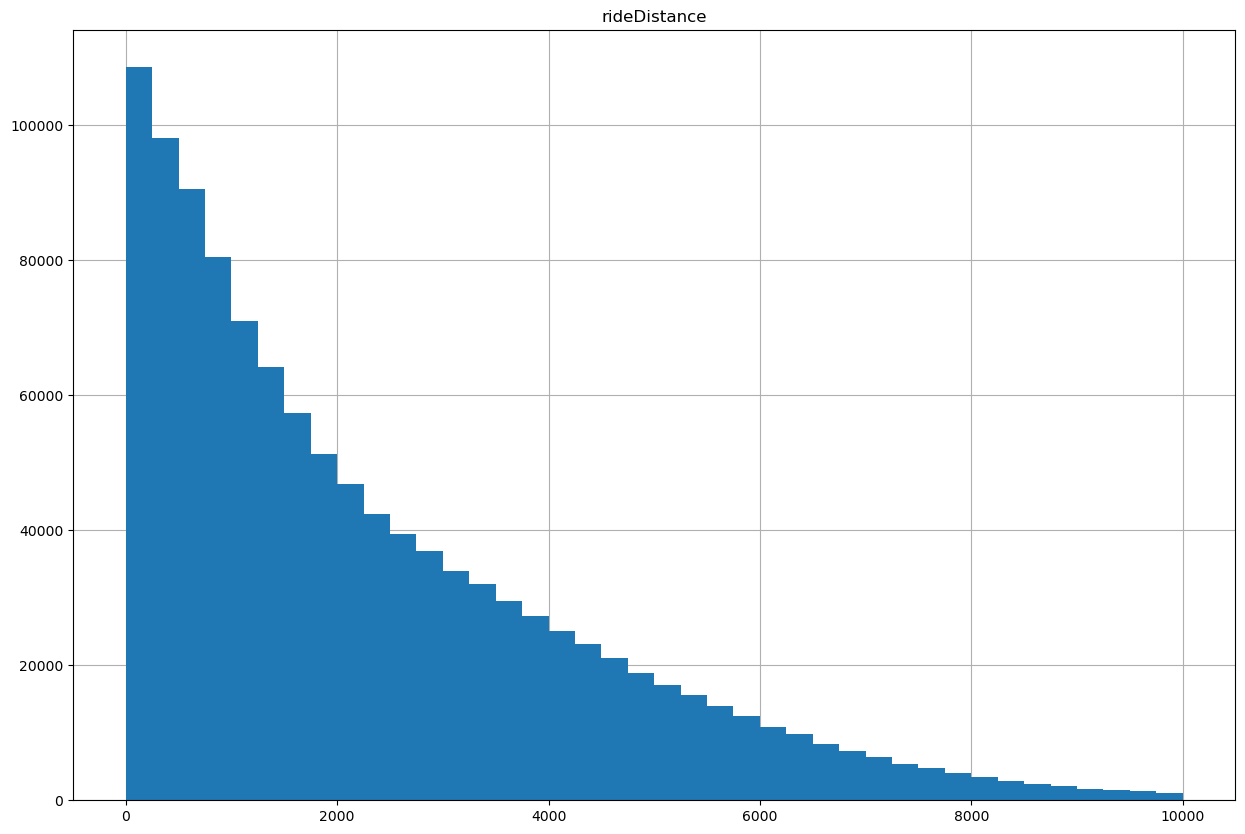

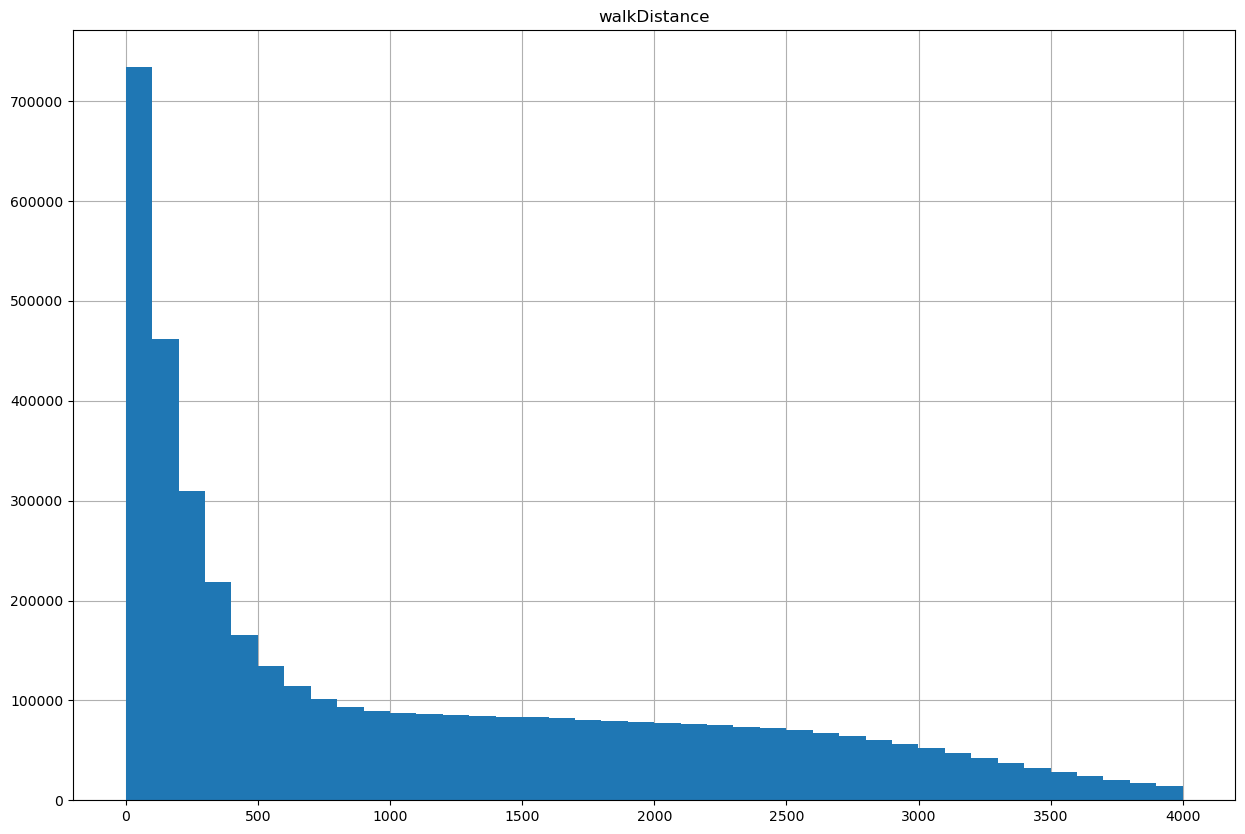

In [30]:
ride = data.query('rideDistance >0 & rideDistance <10000')
walk = data.query('walkDistance >0 & walkDistance <4000')
ride.hist('rideDistance', bins=40, figsize = (15,10))
walk.hist('walkDistance', bins=40, figsize = (15,10))
plt.show()

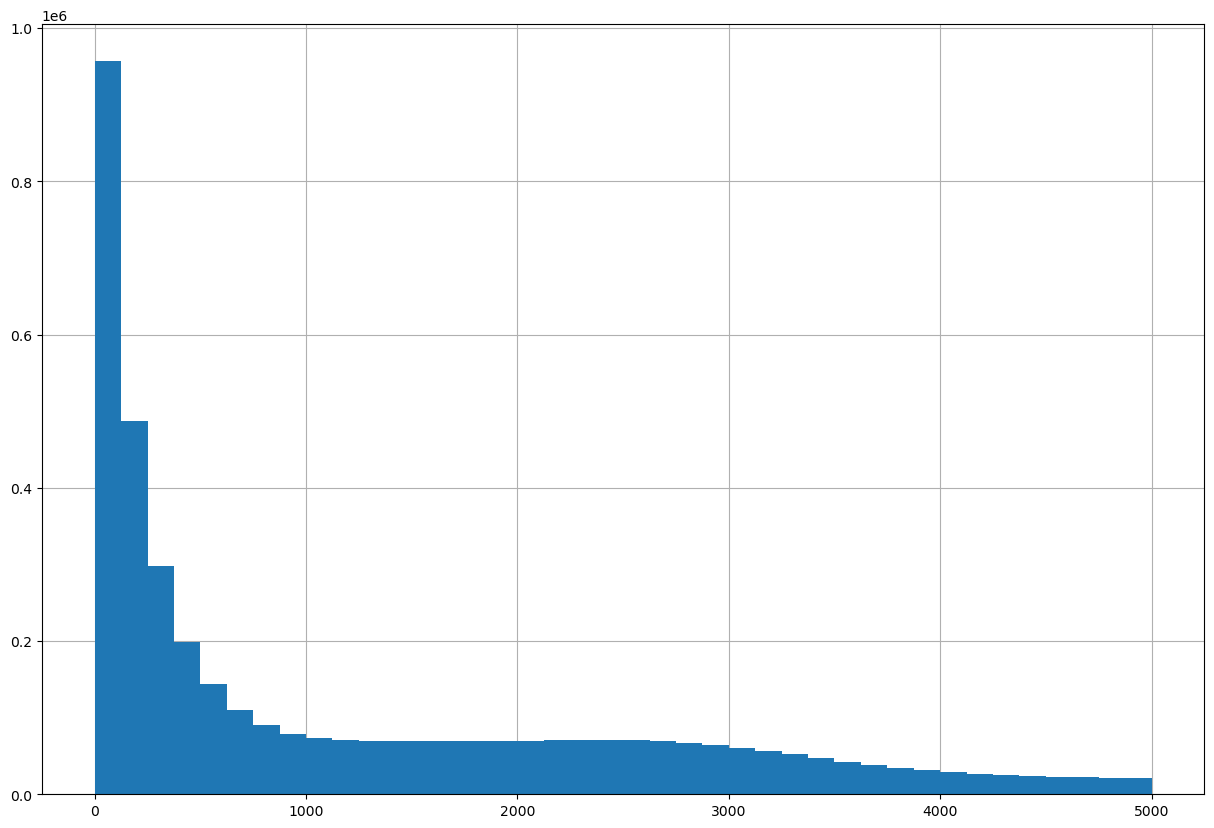

In [31]:
travel_dist = data["walkDistance"] + data["rideDistance"] + data["swimDistance"]
travel_dist = travel_dist[travel_dist<5000]
travel_dist.hist(bins=40, figsize = (15,10))
plt.show()

Average number of acquired weapons is 3.660, minimum is 0 and the maximum 236, 99% of players acquired less than weapons 10.0.


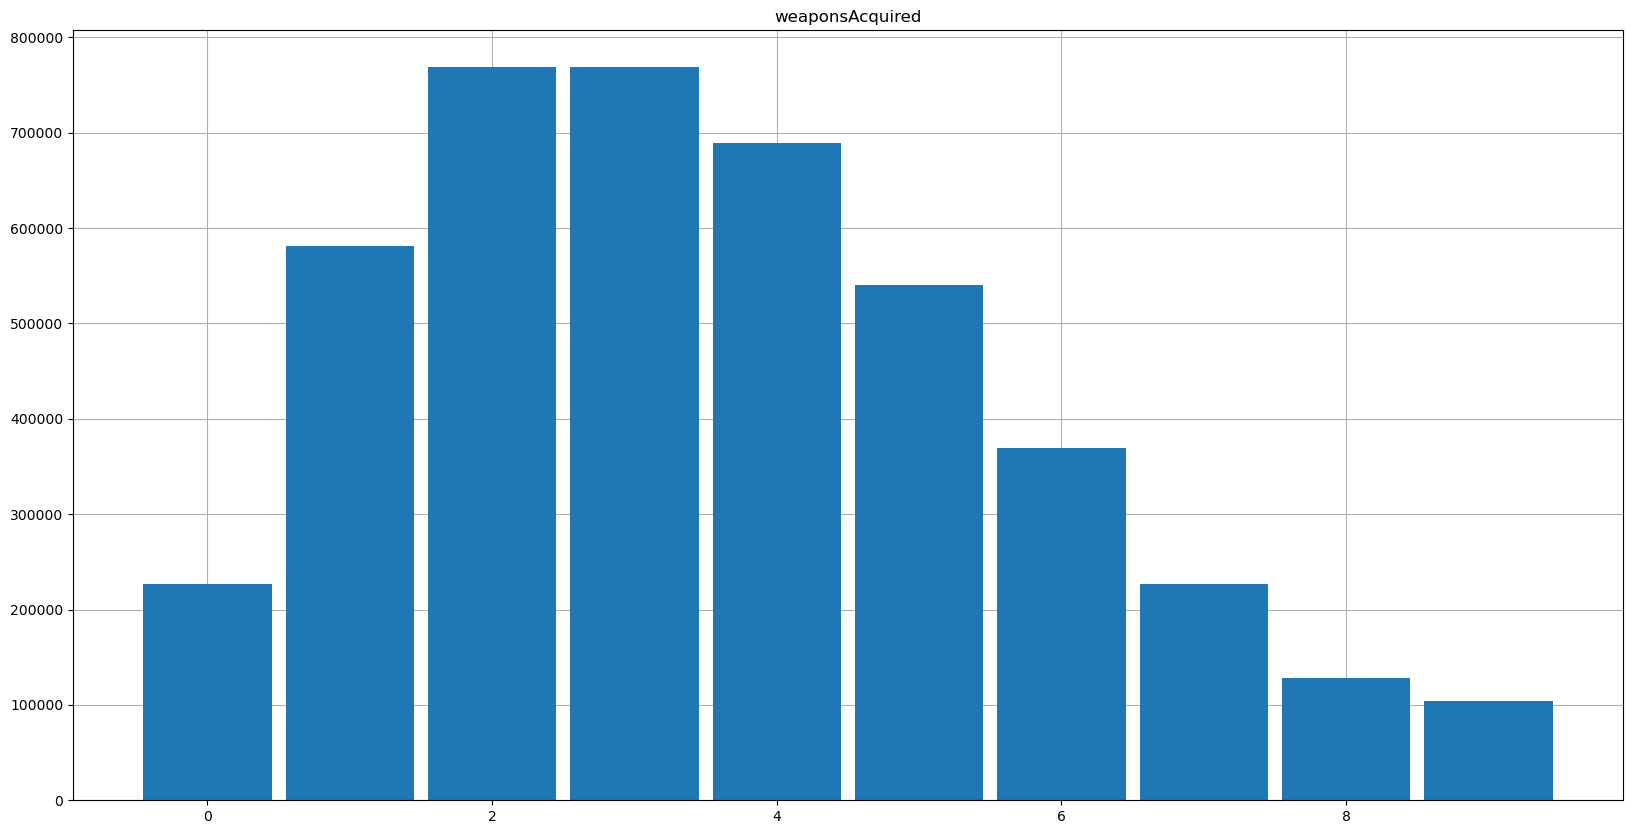

In [32]:
print("Average number of acquired weapons is {:.3f}, minimum is {} and the maximum {}, 99% of players acquired less than weapons {}."
      .format(data["weaponsAcquired"].mean(), data["weaponsAcquired"].min(), data["weaponsAcquired"].max(), data["weaponsAcquired"].quantile(0.99)))
data.hist('weaponsAcquired', figsize = (20,10),range=(0, 10), align="left", rwidth=0.9)
plt.show()

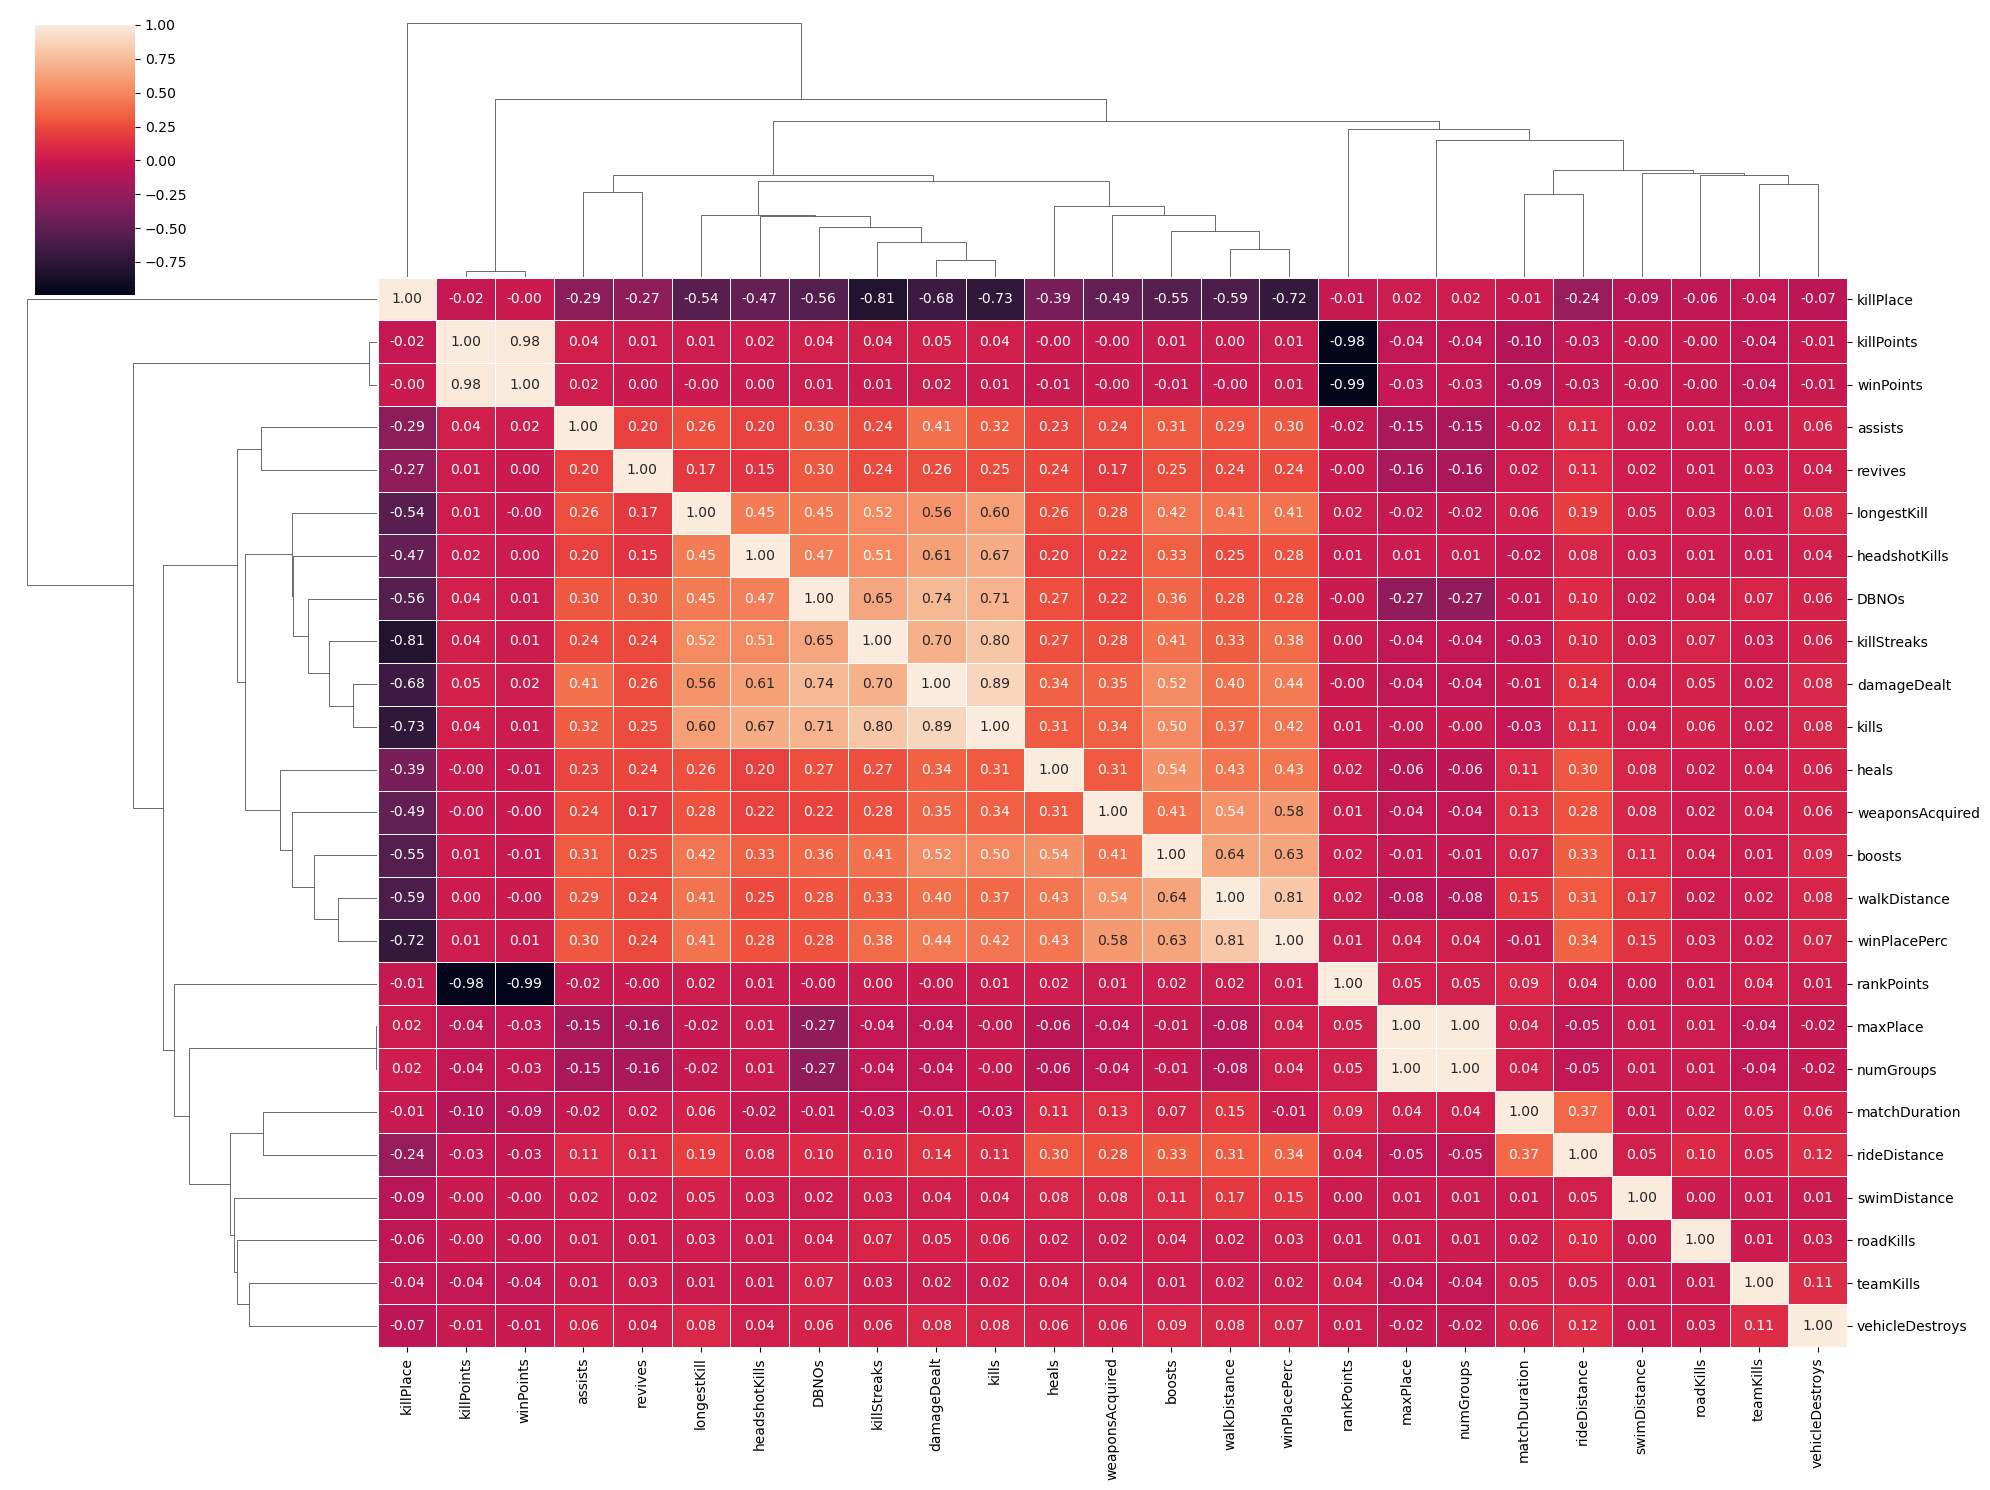

In [33]:
ax = sns.clustermap(data.corr(), annot=True, linewidths=.6, fmt= '.2f', figsize=(20, 15))
plt.show()

In [34]:
top10 = data[data["winPlacePerc"]>0.9]
print("TOP 10% overview\n")
print("Average number of kills: {:.1f}\nMinimum: {}\nThe best: {}\n95% of players within: {} kills."
      .format(top10["kills"].mean(), top10["kills"].min(), top10["kills"].max(),top10["kills"].quantile(0.95)))

TOP 10% overview

Average number of kills: 2.6
Minimum: 0
The best: 72
95% of players within: 8.0 kills.


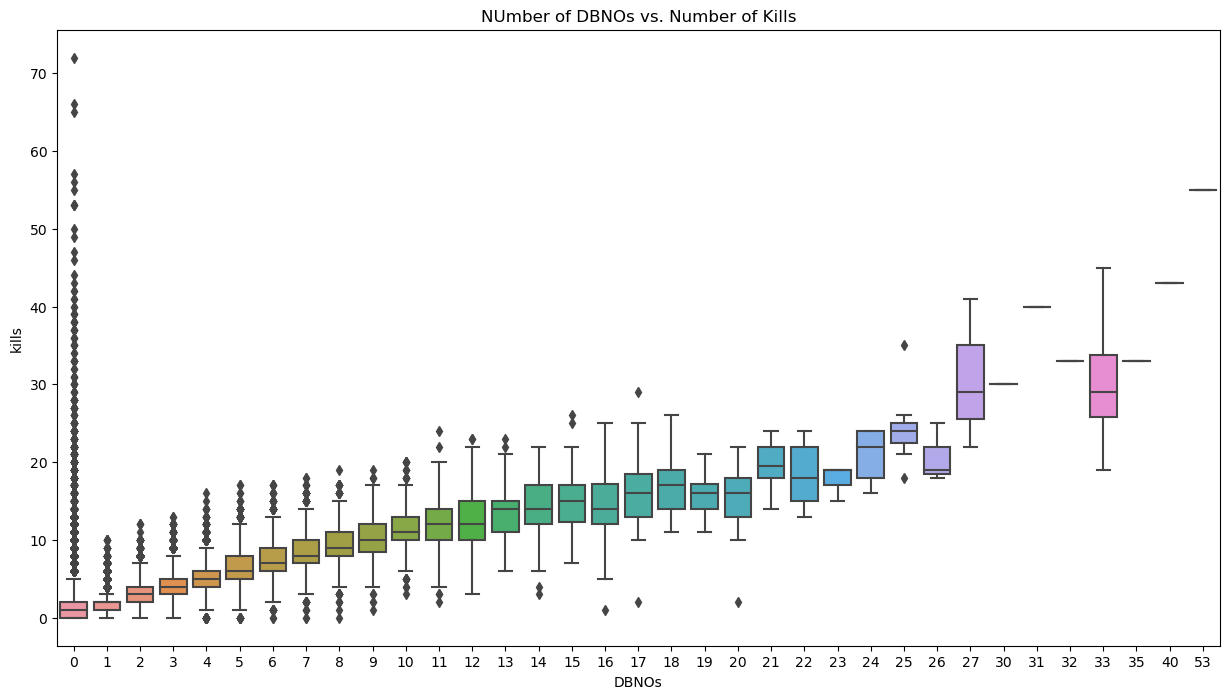

In [35]:
plt.figure(figsize=(15,8))
ax3 = sns.boxplot(x="DBNOs",y="kills", data = top10)
ax3.set_title("NUmber of DBNOs vs. Number of Kills")
plt.show()

Average walking distance: 2813.5134925205784


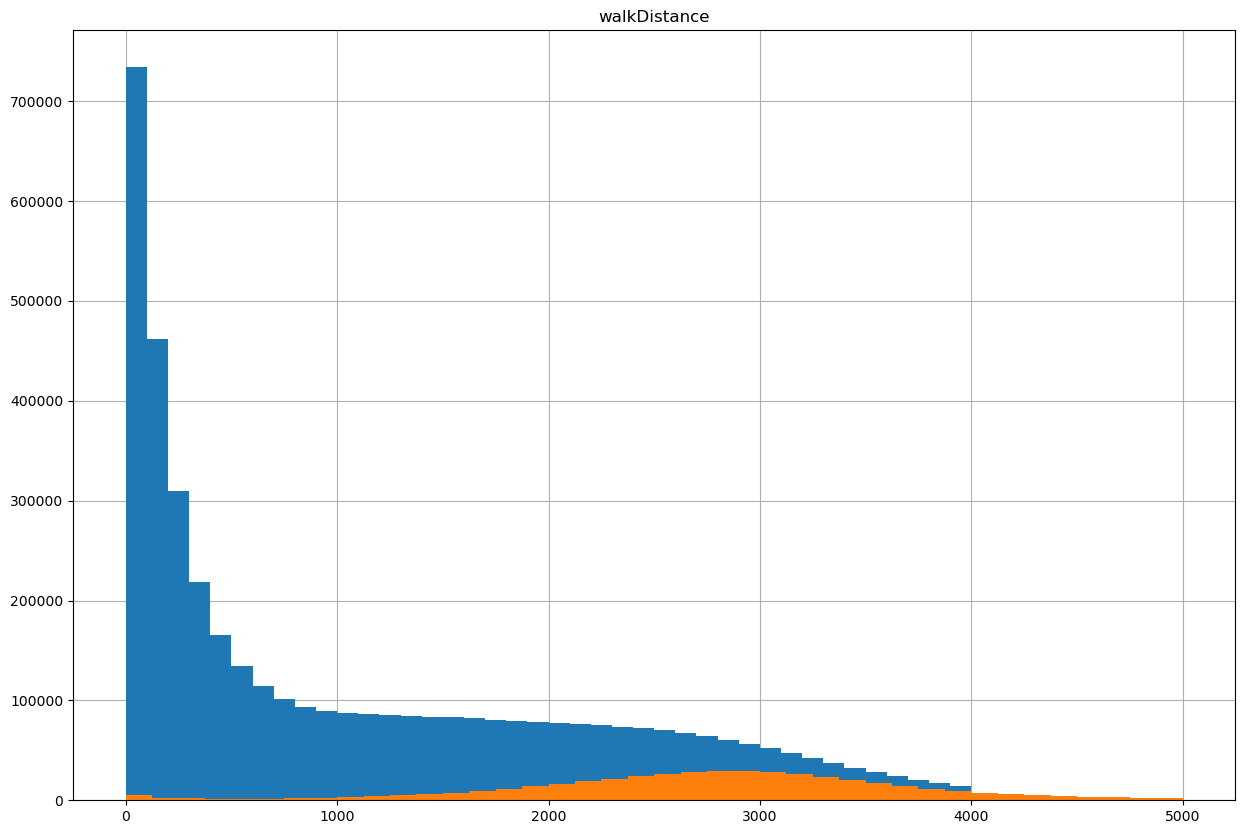

In [36]:
fig, ax1 = plt.subplots(figsize = (15,10))
walk.hist('walkDistance', bins=40, figsize = (15,10), ax = ax1)
walk10 = top10[top10['walkDistance']<5000]
walk10.hist('walkDistance', bins=40, figsize = (15,10), ax = ax1)

print("Average walking distance: " + str(top10['walkDistance'].mean()))

Average riding distance: 1392.0857815081788


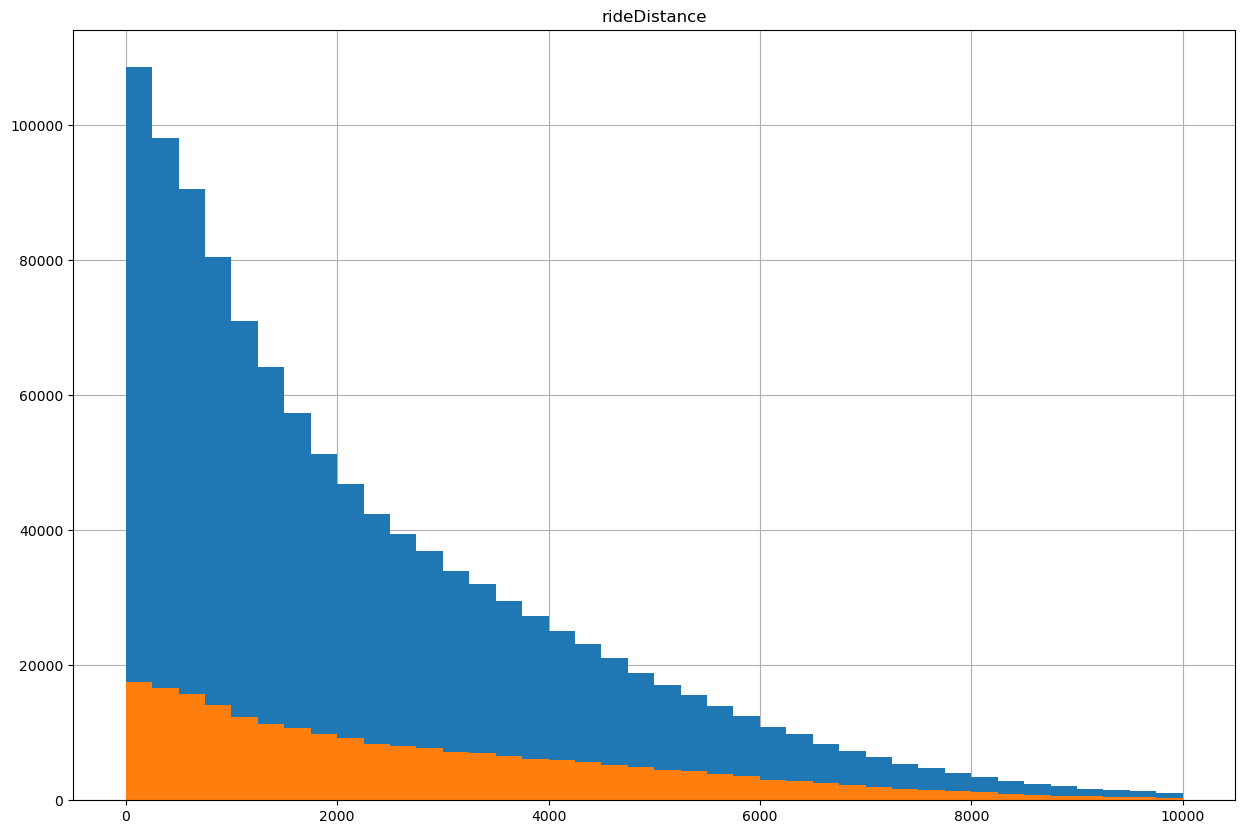

In [37]:
fig, ax1 = plt.subplots(figsize = (15,10))
ride.hist('rideDistance', bins=40, figsize = (15,10), ax = ax1)
ride10 = top10.query('rideDistance >0 & rideDistance <10000')
ride10.hist('rideDistance', bins=40, figsize = (15,10), ax = ax1)
print("Average riding distance: " + str(top10['rideDistance'].mean()))

In [38]:
print("On average the best 10% of players have the longest kill at {:.3f} meters, and the best score is {:.1f} meters." .format(top10["longestKill"].mean(), top10["longestKill"].max()))

On average the best 10% of players have the longest kill at 75.048 meters, and the best score is 1094.0 meters.


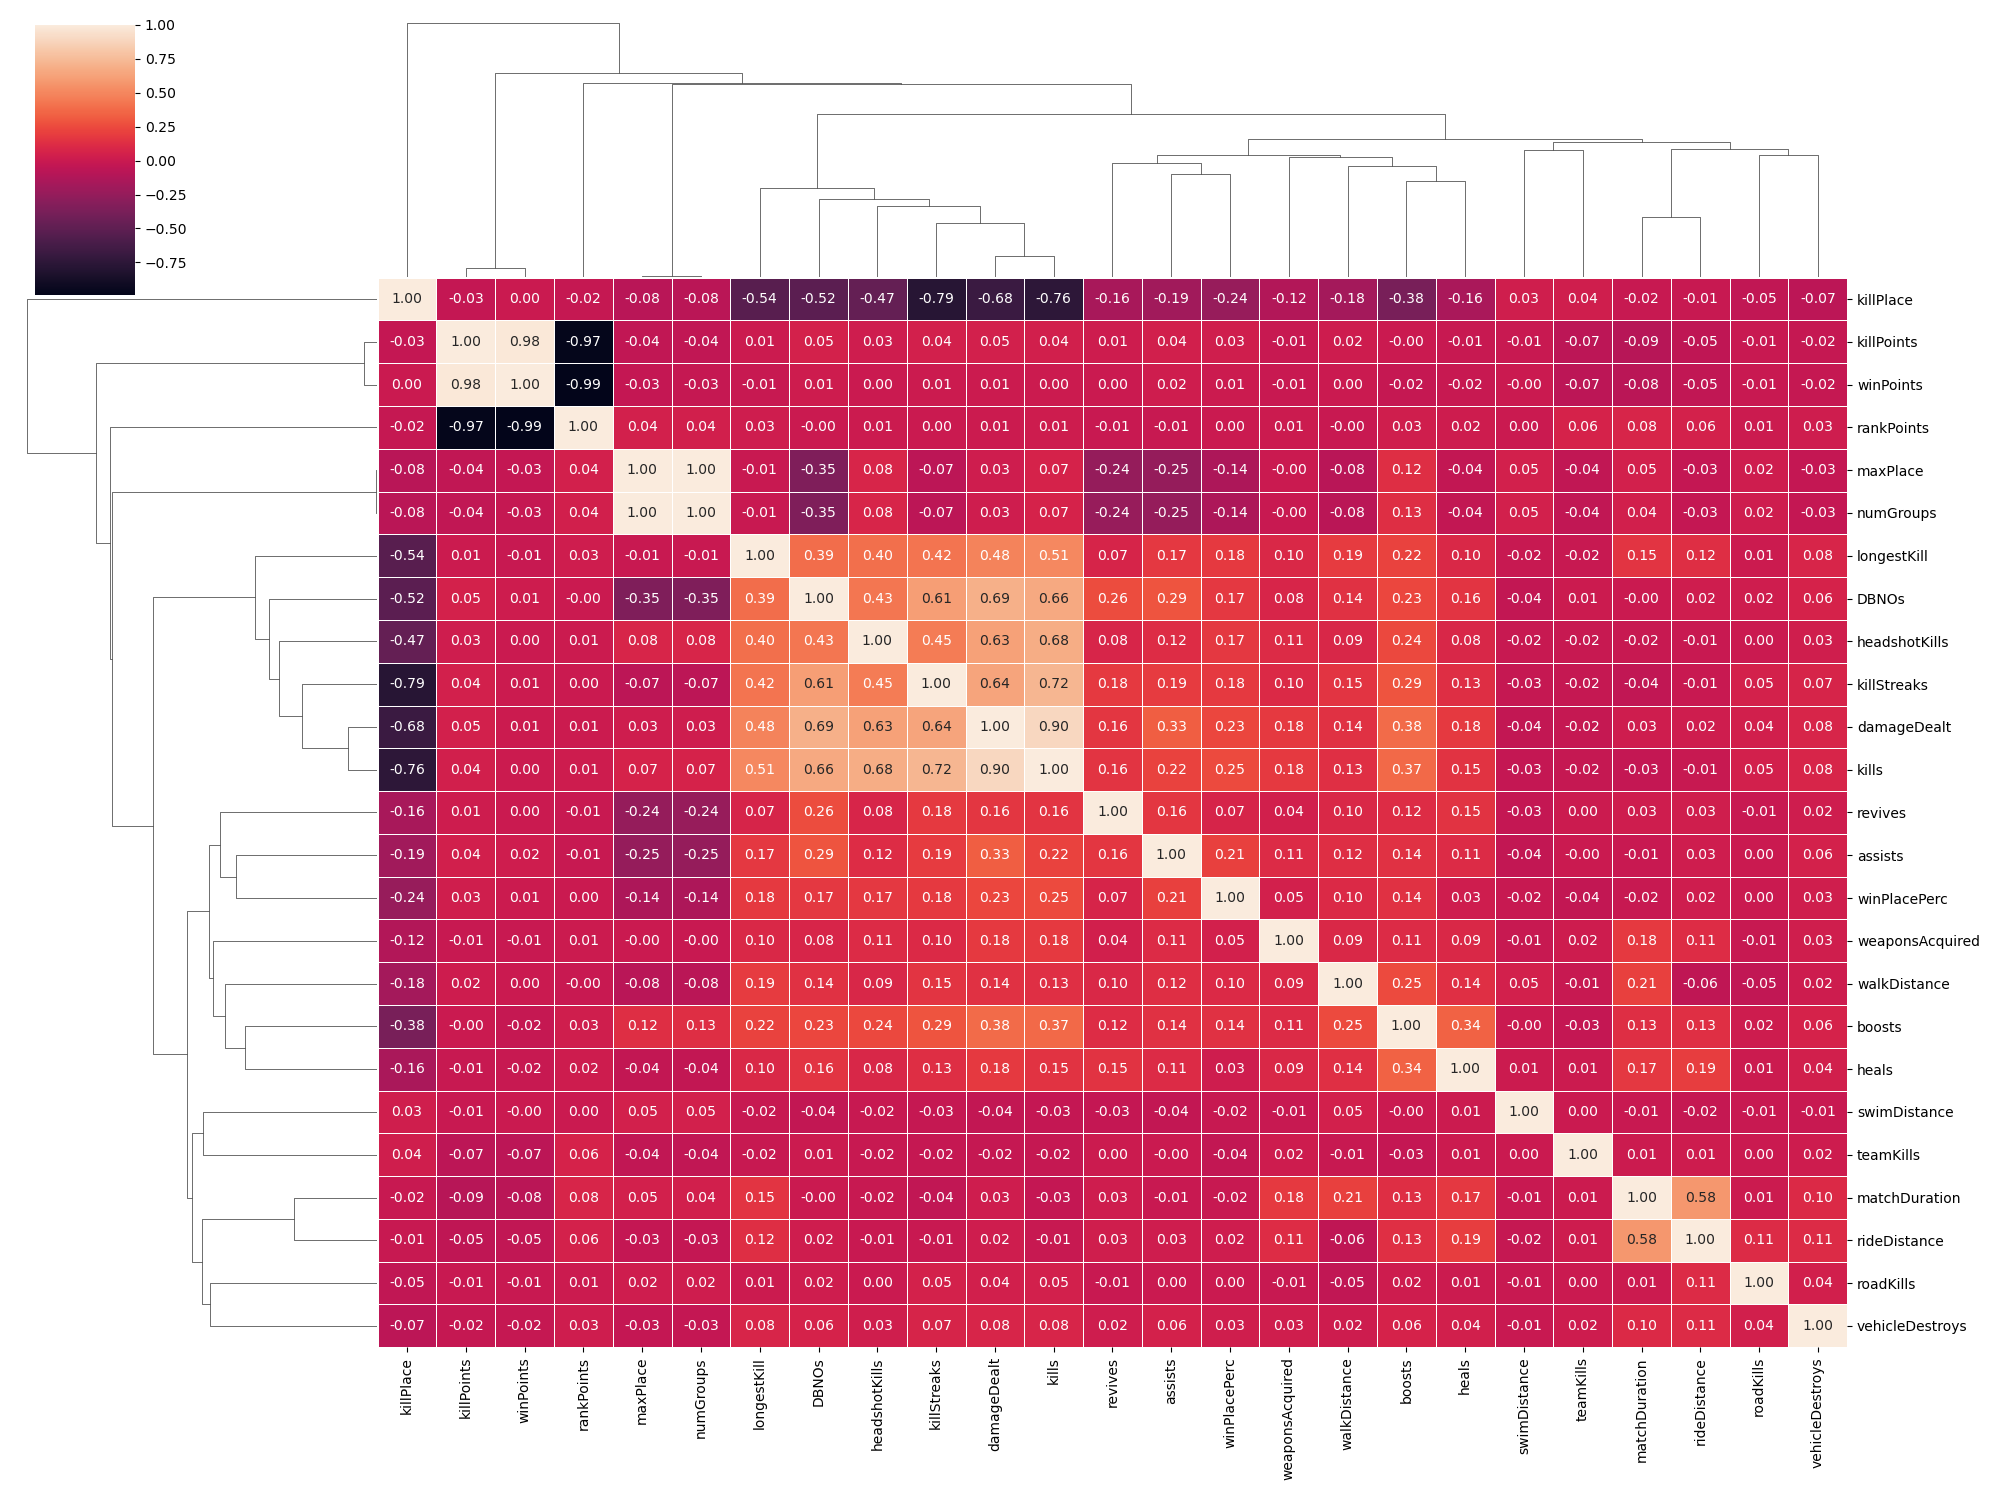

In [39]:
ax = sns.clustermap(top10.corr(), annot=True, linewidths=.5, fmt= '.2f', figsize=(20, 15))
plt.show()

# Prediction Using ML Models

## 1st Model: Linear Regression

In [44]:
data1=data.drop('matchType',axis=1)

In [45]:
x = data1.drop(columns = ['winPlacePerc'])
y = data1['winPlacePerc']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred = LR.predict(x_test)
y_pred

array([0.53409055, 0.91488194, 0.97260547, ..., 0.23072285, 0.3524813 ,
       0.8536863 ])

In [51]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,f1_score

In [52]:
mse = mean_squared_error(y_test,y_pred)
mse

0.015963832657878273

In [53]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.09259198297678241

In [54]:
r2 = r2_score(y_test,y_pred)
r2

0.8308324311667215

## 2nd Model: Decision Tree Regressor

In [55]:
x1 = data1.drop(columns = ['winPlacePerc'])
y1 = data1['winPlacePerc']

In [56]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [57]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x1_train, y1_train)

DecisionTreeRegressor()

In [58]:
y1_pred = regressor.predict(x1_test)

In [60]:
mse = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.01400134055631575


In [61]:
mae = mean_absolute_error(y1_test,y1_pred)
mae

0.08220108167405564

In [62]:
r2 = r2_score(y1_test,y1_pred)
r2

0.8516288166457439

## 3rd Model: Grandient Boosting Regressor

In [63]:
x2 = data1.drop(columns = ['winPlacePerc'])
y2 = data1['winPlacePerc']

In [64]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.2,random_state=42)

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
regressor1 = GradientBoostingRegressor()
regressor1.fit(x2_train, y2_train)

GradientBoostingRegressor()

In [67]:
y2_pred = regressor1.predict(x2_test)

In [68]:
mse = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.009527539336208942


In [69]:
mae = mean_absolute_error(y2_test,y2_pred)
mae

0.06938074603388995

In [70]:
r2 = r2_score(y2_test,y2_pred)
r2

0.8990373614525153

## 4th Model: XGBoost

In [80]:
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

data.dropna(subset=["winPlacePerc"], inplace=True)

x4 = data1.drop(["winPlacePerc"], axis=1)
y4 = data1["winPlacePerc"]

col_names = x4.columns

transformer = Normalizer().fit(x4)
x4 = transformer.transform(x4)

In [81]:
x4 = pd.DataFrame(x4, columns=col_names)

In [82]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2)

D_train = xgb.DMatrix(x4_train, label=y4_train)
D_test = xgb.DMatrix(x4_test, label=y4_test)

In [83]:
param = {
    'eta': 0.15,
    'max_depth': 5,
    'num_class': 2}

steps = 20
model = xgb.train(param, D_train, steps)

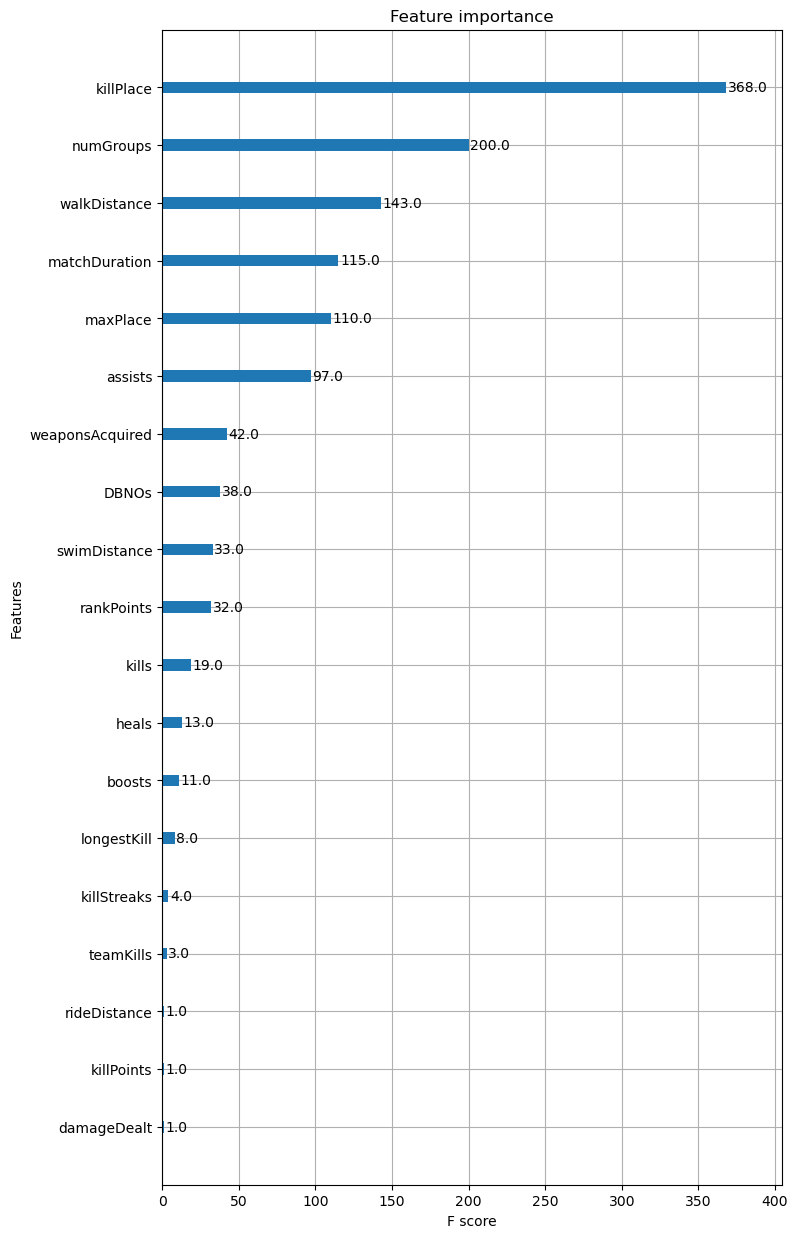

In [84]:
fig, ax1 = plt.subplots(figsize=(8,15))
xgb.plot_importance(model, ax=ax1)
plt.show()

In [89]:
y4_pred=model.predict(D_test)
y4_pred_seq=np.asarray([np.argmax(line) for line in y4_pred])

In [92]:
mse=mean_squared_error(y4_test,y4_pred_seq)
mse

0.3179535701520025

In [93]:
mae = mean_absolute_error(y4_test,y4_pred_seq)
mae

0.4726340679542114